## Encoding Numerical Features

### Binning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('C:\\Data Science Preparation\\1_CampusX - end to end\\100 Days of Machine Learning\\Day19-22\\train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()
# we should drop all the rows with null values

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Without Binning

In [15]:
# separate input and output
x = df.iloc[:,1:]
y = df.iloc[:, 0]

In [17]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
# import decision trees
from sklearn.tree import DecisionTreeClassifier

# create object
clf = DecisionTreeClassifier()

# train the model
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# accuracy score
from sklearn.metrics import accuracy_score

# remember to send y_test before y_pred
accuracy_score(y_test, y_pred)

0.6223776223776224

In [23]:
# cross validation
from sklearn.model_selection import cross_val_score

# remember you send the entire input and output and not train_input/ output
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

0.6345070422535211

### Using Binnning

In [40]:
# import the Discretizer
from sklearn.preprocessing import KBinsDiscretizer

# create objects
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [48]:
# use these objects to transform the columns
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('first', kbin_age, [0]),   # apply kbin_age Discretizer on column 0
    ('second', kbin_fare, [1])    # apply kbin_fare Dicretizer on column 1
])
# default remainder='drop'

In [49]:
# transform the train and test splits with the Transformer object
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

# note we dont do this for y_train/ test becuse it is a reasult column and it doesn't need transforms

In [50]:
# if you want to view transformers
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [60]:
# treat it like an array
trf.named_transformers_['first'].bin_edges_
# and like this you can view different attributes about the transformer object

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [66]:
# viewing the transformed and un-transformed data side by side
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:,0],
    'fare': x_train['Fare'],
    'fare_trf': x_train_trf[:,1]
})
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [67]:
# adding the bin labels to see which bin they end up in....
output['age_labels'] = pd.cut(x=x_train['Age'],
                              bins= trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                              bins= trf.named_transformers_['second'].bin_edges_[0].tolist())

In [68]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,7.0,134.5000,9.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,6.0,20.5250,5.0,"(32.0, 36.0]","(15.75, 26.0]"


In [71]:
# now train model with the transformed data
clf = DecisionTreeClassifier()

clf.fit(x_train_trf, y_train)
y_pred2 = clf.predict(x_test_trf)

accuracy_score(y_test, y_pred2)

0.6223776223776224

In [74]:
# cross validation
x_trf = trf.fit_transform(x)

np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

0.6330985915492958

### Creating a Function to Automate this with different Encoding

In [79]:
def discretize(bins, strategy):
    # create Discretizers
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    # create Transformers
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    # we are going to cross validation straight away
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy')))

    # plot the graphs
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:, 0], color='red')
    plt.title('After')
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:, 0], color='red')
    plt.title('After')
    plt.show()

0.6218896713615022


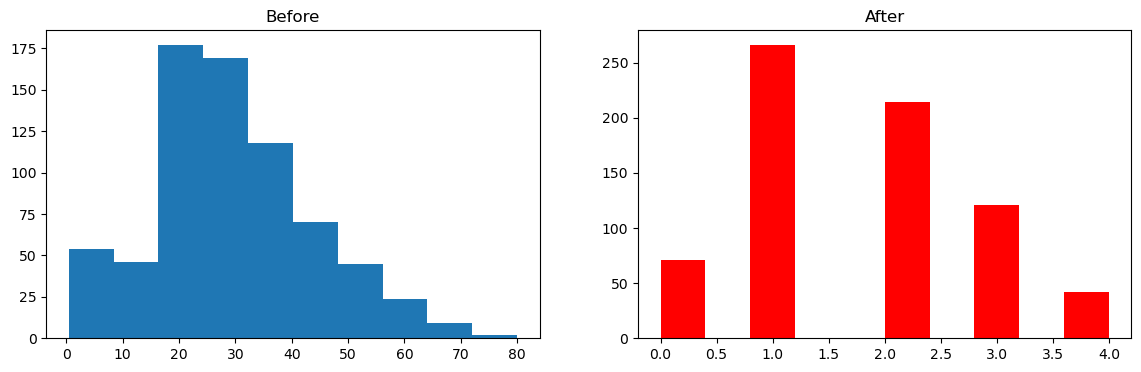

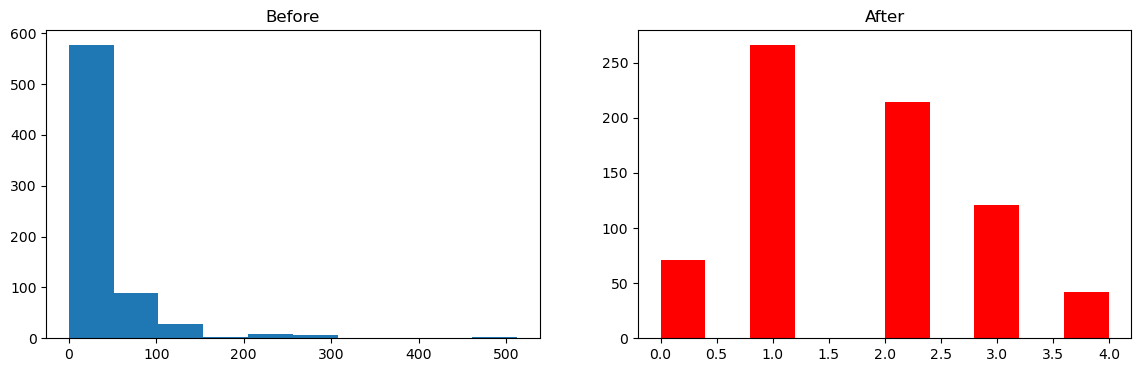

In [81]:
# calling the funcitons
discretize(5, 'kmeans')

0.6359154929577464


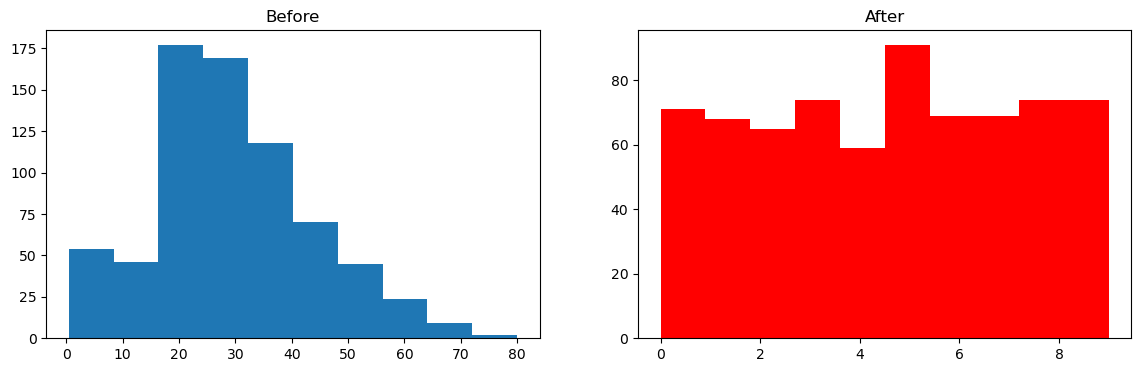

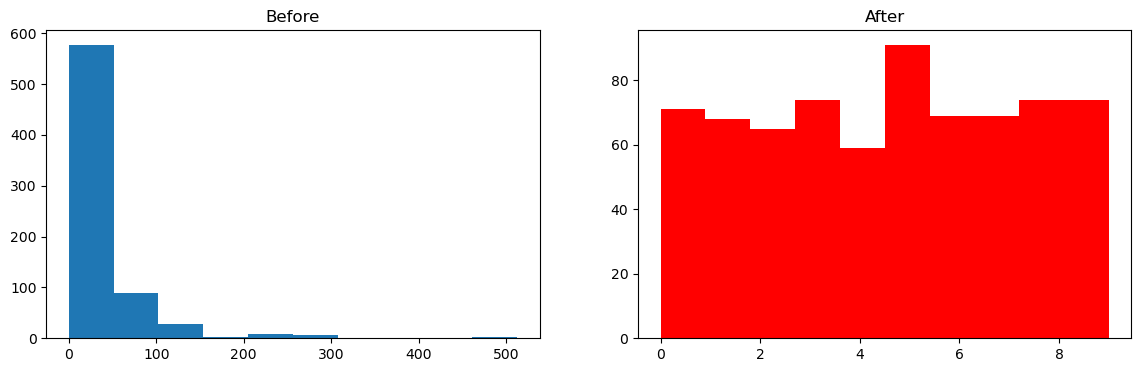

In [83]:
discretize(10, 'quantile')

0.6260758998435054


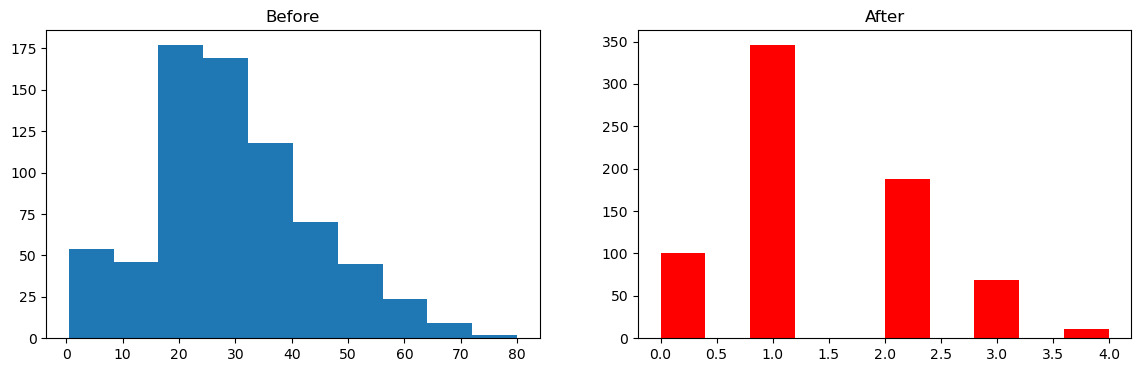

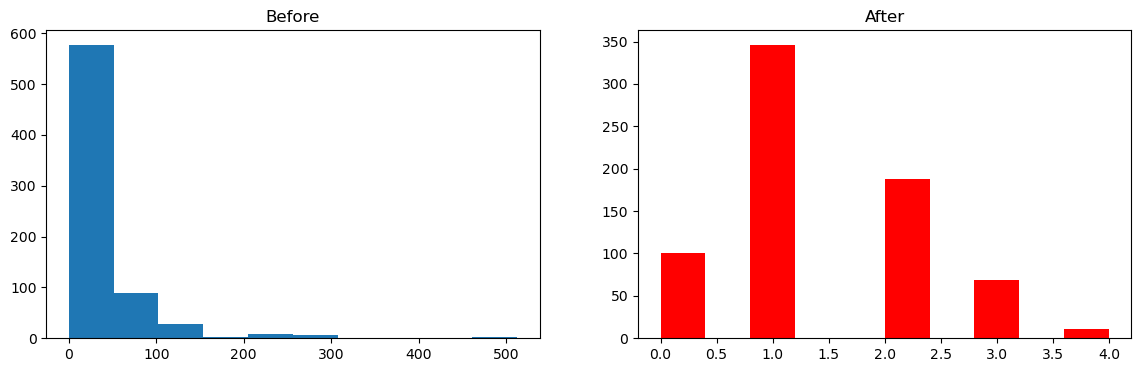

In [86]:
discretize(5, 'uniform')